<a href="https://colab.research.google.com/github/parazzz/OIBSIP_datascience_task2/blob/main/spam_detection_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset (assuming it's a CSV file)
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

In [3]:
# Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [9]:
import pandas as pd
import re

# Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text



In [5]:
# Display the cleaned text
print(df.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df['text'])


In [13]:
# Extract the labels
y = df['label']



In [17]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

In [20]:
# Train the model
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
# Make predictions on the test data
y_pred = model.predict(X_test)


In [23]:
# Import the necessary functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

def classify_message(text):
    cleaned_text = clean_text(text)
    text_vector = tfidf.transform([cleaned_text])
    prediction = model.predict(text_vector)
    return prediction[0]

# Example usage
message = "Congratulations! You've won a $1,000 gift card. Click here to claim your prize."
print(classify_message(message))


Accuracy: 0.9623318385650225
Precision: 1.0
Recall: 0.72
F1 Score: 0.8372093023255813
spam


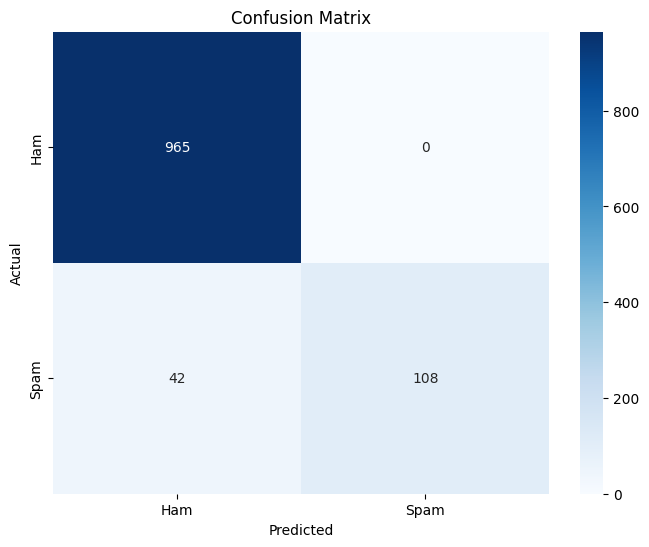

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


evaluate best model

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {'alpha': [0.1, 0.5, 1.0]}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5)  # 'model' should be your existing MultinomialNB model

# Fit the grid search to your training data (replace X_train and y_train with your actual training data)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Now you can use best_model.predict(X_test)
y_pred_best = best_model.predict(X_test)


Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict
y_pred_log_reg = log_reg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg, pos_label='spam')
recall = recall_score(y_test, y_pred_log_reg, pos_label='spam')
f1 = f1_score(y_test, y_pred_log_reg, pos_label='spam')

print(f'Logistic Regression Accuracy: {accuracy}')
print(f'Logistic Regression Precision: {precision}')
print(f'Logistic Regression Recall: {recall}')
print(f'Logistic Regression F1 Score: {f1}')


Logistic Regression Accuracy: 0.9623318385650225
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.72
Logistic Regression F1 Score: 0.8372093023255813
